In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from utils import FlattenData, loadJSON, loadpkl

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [10]:
# load csv
profiles = pd.read_csv('../input/data_set_phase1/profiles.csv')
test_plans = pd.read_csv('../input/data_set_phase1/test_plans.csv')
test_queries = pd.read_csv('../input/data_set_phase1/test_queries.csv')
train_clicks = pd.read_csv('../input/data_set_phase1/train_clicks.csv')
train_plans = pd.read_csv('../input/data_set_phase1/train_plans.csv')
train_queries = pd.read_csv('../input/data_set_phase1/train_queries.csv')

In [11]:
# merge click
train_plans = pd.merge(train_plans, train_clicks[['sid','click_mode']], on='sid', how='outer')

# fill na
train_plans['click_mode'].fillna(0, inplace=True)

# set test target as nan
test_plans['click_mode'] = np.nan

# merge train & test
plans = train_plans.append(test_plans)

del train_plans, test_plans
gc.collect()

# reset index
plans.reset_index(inplace=True,drop=True)

# load JSON
for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode']):
    plans[key] = plans.plans.apply(lambda x: loadJSON(x,key))

# flattenData
plans_df = [FlattenData(plans, key) for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode'])]
plans_df = pd.concat(plans_df,axis=1)

In [12]:
plans_df.dropna(inplace=True)
plans_df = pd.merge(plans_df.reset_index(), plans[['sid','plan_time', 'click_mode']], on='sid',how='outer')
plans_df.loc[plans_df['click_mode'].notnull(),'target'] = (plans_df['transport_mode']==plans_df['click_mode']).astype(int)
plans_df.head()

,sid,distance,price,eta,transport_mode,plan_time,click_mode,target
0,1709112,32303.0,600,5087.0,9.0,2018-11-04 11:45:04,9.0,1.0
1,1709112,33678.0,,3149.0,3.0,2018-11-04 11:45:04,9.0,0.0
2,1709112,33678.0,10000,3269.0,4.0,2018-11-04 11:45:04,9.0,0.0
3,1709112,32099.0,600,5996.0,2.0,2018-11-04 11:45:04,9.0,0.0
4,1709112,30446.0,900,6494.0,1.0,2018-11-04 11:45:04,9.0,0.0


In [52]:
plans_df['plan_time'] = pd.to_datetime(plans_df.plan_time)
plans_df['weekday'] = plans_df['plan_time'].dt.weekday
plans_df['hour'] = plans_df['plan_time'].dt.hour

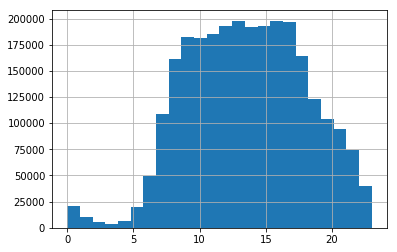

In [48]:
plans_df['plan_time'].dt.hour.hist(bins=24)

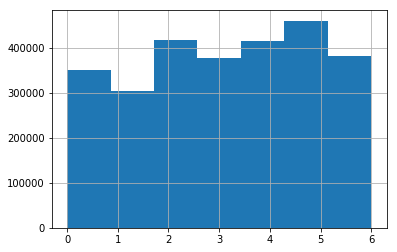

In [50]:
plans_df['plan_time'].dt.weekday.hist(bins=7)

In [14]:
profiles.head()

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65
0,196356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204083,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,170667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,115511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,129719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
queries

,sid,pid,req_time,o,d
0,3000821,NaN,2018-11-02 17:54:30,"116.29,39.97","116.32,39.96"
1,3085857,210736.0,2018-11-16 10:53:10,"116.39,39.84","116.33,39.79"
2,2944522,NaN,2018-10-06 10:33:58,"116.31,39.93","116.27,40.00"
3,559931,202427.0,2018-11-23 14:54:11,"116.27,39.88","116.39,39.90"
4,2819352,172251.0,2018-10-30 11:48:41,"116.34,39.96","116.37,39.86"
5,2754575,135606.0,2018-10-18 07:37:32,"116.54,39.73","116.48,39.76"
6,2224795,189023.0,2018-11-20 14:34:03,"116.34,39.73","116.79,40.35"
7,1598541,156954.0,2018-10-03 09:19:47,"116.26,40.22","116.24,40.22"
8,676316,135045.0,2018-11-15 15:25:52,"116.39,39.91","116.39,39.90"
9,1068802,176605.0,2018-11-08 23:13:57,"116.29,40.02","116.27,39.95"


In [5]:
test_queries.head()

,sid,pid,req_time,o,d
0,1126541,178395.0,2018-12-05 14:51:43,"116.41,39.92","116.46,39.95"
1,453685,179178.0,2018-12-01 12:50:33,"116.39,39.90","116.41,39.91"
2,2066073,184748.0,2018-12-07 10:17:35,"116.37,39.71","116.31,39.89"
3,452746,162795.0,2018-12-01 07:52:44,"116.33,39.97","116.31,39.98"
4,1431672,116384.0,2018-12-06 10:36:30,"116.51,39.68","116.51,39.68"


In [6]:
train_clicks.head()

,sid,click_time,click_mode
0,2848914,2018-11-17 18:42:17,1
1,2629085,2018-10-12 16:28:13,3
2,602598,2018-11-11 16:38:42,2
3,2022975,2018-10-14 12:28:11,9
4,988425,2018-11-12 16:47:30,7


In [7]:
train_plans.head()

,sid,plan_time,plans
0,1709112,2018-11-04 11:45:04,"[{""distance"": 32303, ""price"": 600, ""eta"": 5087..."
1,3327773,2018-10-16 19:09:29,"[{""distance"": 3427, ""price"": 300, ""eta"": 627, ..."
2,3285959,2018-11-25 15:05:22,"[{""distance"": 36234, ""price"": 1100, ""eta"": 931..."
3,1616170,2018-10-03 14:42:40,"[{""distance"": 11450, ""price"": 400, ""eta"": 2801..."
4,351369,2018-10-05 19:52:37,"[{""distance"": 18495, ""price"": 600, ""eta"": 4271..."


In [8]:
train_queries.head()

,sid,pid,req_time,o,d
0,3000821,NaN,2018-11-02 17:54:30,"116.29,39.97","116.32,39.96"
1,3085857,210736.0,2018-11-16 10:53:10,"116.39,39.84","116.33,39.79"
2,2944522,NaN,2018-10-06 10:33:58,"116.31,39.93","116.27,40.00"
3,559931,202427.0,2018-11-23 14:54:11,"116.27,39.88","116.39,39.90"
4,2819352,172251.0,2018-10-30 11:48:41,"116.34,39.96","116.37,39.86"


In [14]:
train_queries['x_o']=train_queries.o.apply(lambda x: x.split(',')[0]).astype(float)
train_queries['y_o']=train_queries.o.apply(lambda x: x.split(',')[1]).astype(float)
test_queries['x_o']=test_queries.o.apply(lambda x: x.split(',')[0]).astype(float)
test_queries['y_o']=test_queries.o.apply(lambda x: x.split(',')[1]).astype(float)

train_queries['x_d']=train_queries.d.apply(lambda x: x.split(',')[0]).astype(float)
train_queries['y_d']=train_queries.d.apply(lambda x: x.split(',')[1]).astype(float)
test_queries['x_d']=test_queries.d.apply(lambda x: x.split(',')[0]).astype(float)
test_queries['y_d']=test_queries.d.apply(lambda x: x.split(',')[1]).astype(float)

In [4]:
queries = train_queries.append(test_queries)
plans = train_plans.append(test_plans)

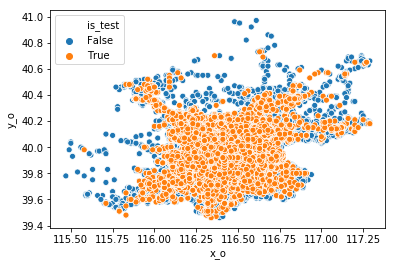

In [16]:
sns.scatterplot(x='x_o', y='y_o',hue='is_test' ,data=queries)

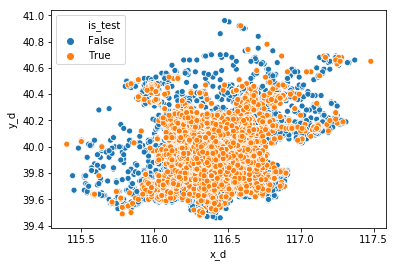

In [17]:
sns.scatterplot(x='x_d', y='y_d',hue='is_test' ,data=queries)

In [5]:
plans.reset_index(inplace=True,drop=True)

In [6]:
plans

,sid,plan_time,plans
0,1709112,2018-11-04 11:45:04,"[{""distance"": 32303, ""price"": 600, ""eta"": 5087..."
1,3327773,2018-10-16 19:09:29,"[{""distance"": 3427, ""price"": 300, ""eta"": 627, ..."
2,3285959,2018-11-25 15:05:22,"[{""distance"": 36234, ""price"": 1100, ""eta"": 931..."
3,1616170,2018-10-03 14:42:40,"[{""distance"": 11450, ""price"": 400, ""eta"": 2801..."
4,351369,2018-10-05 19:52:37,"[{""distance"": 18495, ""price"": 600, ""eta"": 4271..."
5,749203,2018-10-01 07:03:52,"[{""distance"": 32486, ""price"": """", ""eta"": 2491,..."
6,3005789,2018-10-22 11:45:20,"[{""distance"": 4935, ""price"": 300, ""eta"": 1568,..."
7,1897386,2018-11-13 18:51:27,"[{""distance"": 22103, ""price"": 500, ""eta"": 3361..."
8,845203,2018-11-26 12:43:56,"[{""distance"": 12422, ""price"": 400, ""eta"": 2324..."
9,536341,2018-11-23 19:34:38,"[{""distance"": 2162, ""price"": 200, ""eta"": 1239,..."


In [7]:
for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode']):
    plans[key] = plans.plans.apply(lambda x: loadJSON(x,key))

In [8]:
# flattenData
plans_df = [FlattenData(plans, key) for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode'])]
plans_df = pd.concat(plans_df,axis=1)

In [5]:
df = loadpkl('../features/plans.pkl')

In [ ]:
plans_df.groupby('sid').max()